# Plotting probabilities using Matplotlib

__Covers__
 - Creating simple plots using Matplotlib
 - Labeling plotted data
 - What is a probability distribution
 - Plotting and comparing multiple probability distributions

In this section, we use Matplotlib to better comprehend the coin-flip probabilities that we computed in section 1

In [1]:
# Listing 2.1 Importing matplotlib
import matplotlib.pyplot as plt

from functions import *


We will now plot some data using `plt.plot`. That method takes as inputs two _iterables_, _x_ and _y_. Calling `plt.plot(x, y)` prepares a 2D plot of x versus y; displaying the plot requires a subsequent call to `plt.show()`. Let's assign our x equal to integers 0 through 10 and our y values equal to double the values of x. 

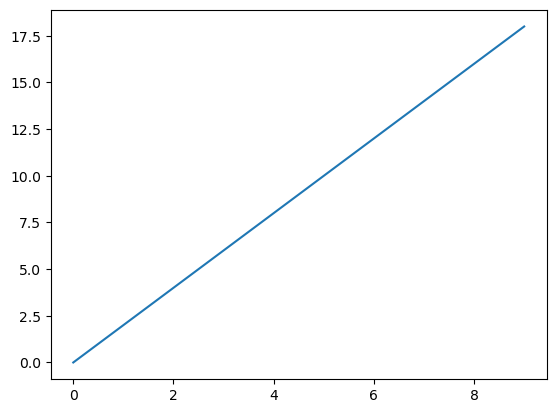

In [2]:
# Listin 2.2 Plotting a linear relationship

x = range(0, 10) # create a list of x values
y = [2 * value for value in x] # create a list of y values
plt.plot(x, y)
# plt.axis('equal') # set the aspect ratio of the plot to be equal
plt.show()


__WARNING__ The axes in the linear plot are not evenly spaced, so the slope of the line appears less steep than it actually is. Calling `plt.axis('equal')` fixes this. However, this will lead to awkward visualization containing too much whitespace.

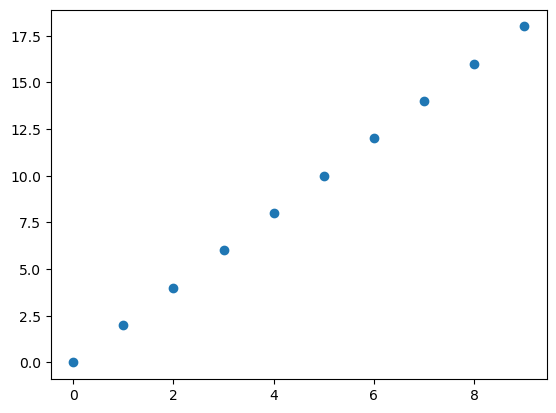

In [3]:
# Listin 2.3 Plotting individual data points

plt.scatter(x, y)
plt.show()

Suppose we want to emphasize the interval where x begins at 2 and ends at 6. We do this by shading the area under the plotted curve over the specified interval, using the `plt.fill_between` methos. The beghor takes as input both x and y and also a `where` parameter, which defines the interval coverage. The input of the `where` parameter is a list of boolean values in which an element is `True` if the x value at the corresponding index falls within the interval we specified. In the following code, we set the `where` parameter to equal [`is_in_interval(value, 2, 6)` for value in x]. We also execute `plt.plot(x, y)` to juxtapose the shaded interval with the smoothly connected line.

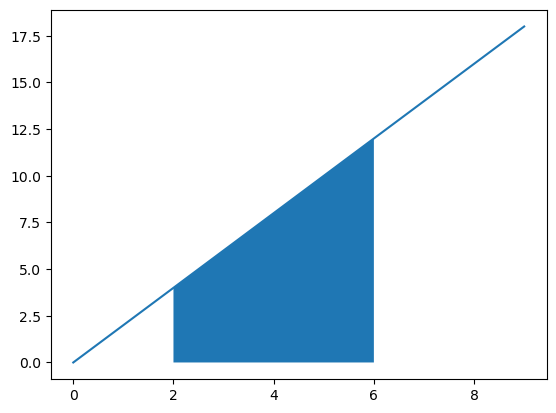

In [4]:
# Listing 2.4 Shading an interval beneath a connected plot

plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

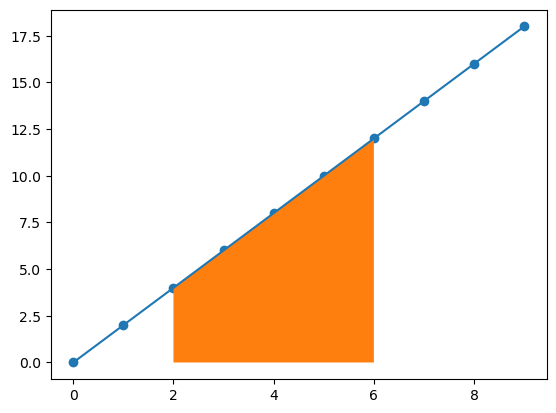

In [5]:
# Listin 2.5 Exposing individual coordinates within a contiuous plot

plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

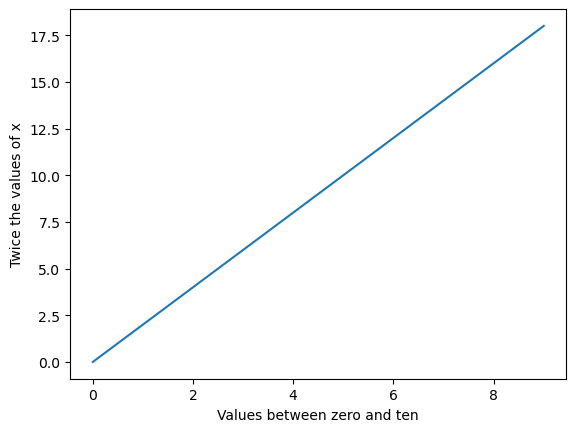

In [6]:
# Listing 2.6 Adding axis labels

plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

<div class="alert alert-block alert-info">
<b>Common Matplotlib methods</b>
<ul>
 <li><code>plt.plot(x, y)</code> - Plots the elements of x versus elements of y. The plotted points are connected using smooth line segments.</li>
 <li><code>plt.scatter(x, y)</code> - Plots the elements of x versus the elements of y. The plotted points are visualized individually and are not connected by any lines.</li>
 <li><code>plt.fill_between(x, y, where=booleans)</code> - Highlights a subset a subset of the area beneath a plotted curve. The curve is obtained obtained by plotting x versus y. The <code>where</code> parameter defines all highlighted intervas; it takes a list of Booleans that correspond to elements of x. Each Boolean is <code>True</code> if its corresponding x value is located within a highlighted interval</li>
 <li><code>plt.xlabel(label)</code> - Sets the x label of the plotted curve to equal <code>label</code></li>
 <li><code>plt.ylabel(label)</code> - Sets the y label of the plotted curve to equal <code>label</code></li>
 </ul>
</div>

### Plotting coin flip probabilities

Now we have to tools to visualise the relationship between a coin-fip count and the probability of heads. The keys in `weighted_sample_space` contain all possible head counts across 10 flipped coins. These head counts map to combination counts. Meanwhile the `weighted_sample_space_20_flips` dictionary contains the head-count mapping of 20 flipped coins.

In [7]:
weighted_sample_space = generate_coin_sample_space(10)
weighted_sample_space_20_flips = generate_coin_sample_space(20)

In [8]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f"Probability of observing more that 7 heads is {prob}")

Probability of observing more that 7 heads is 0.0546875


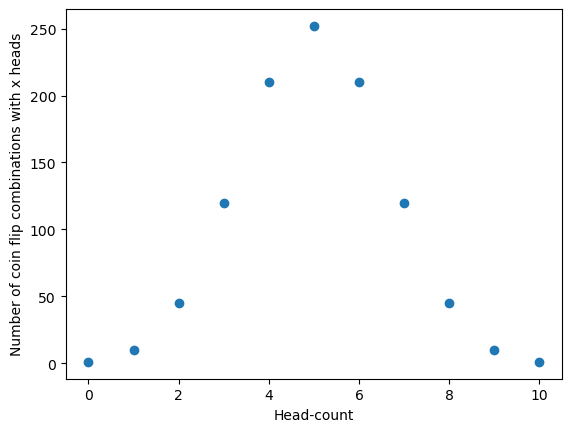

In [9]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin flip combinations with x heads')
plt.show()

__A scatter plot representation of the sample space for 10 flipped coins. The symmetric plot is cemtered around a peak at 5 og 10 counted head__

The visualised sample space takes on a symmetric shape. The symmetry is set around a peak head count around 5. Therefore, head-combinations closer to 5 occur more frequently than those that are further from 5. As we learned in the previous section, such frequencies correspond to probabilities. Thus, a head count is more probable if its value is closer to 5. Let's emphasise this by plotting the probabilities directly on the y-axis. The probability plot will allow us to replace our lengthy y-axis label with a more concisely stated _probability_. We can compute the y-axis probailities by taking our existing combinations counts and dividing them by the total sample space size.

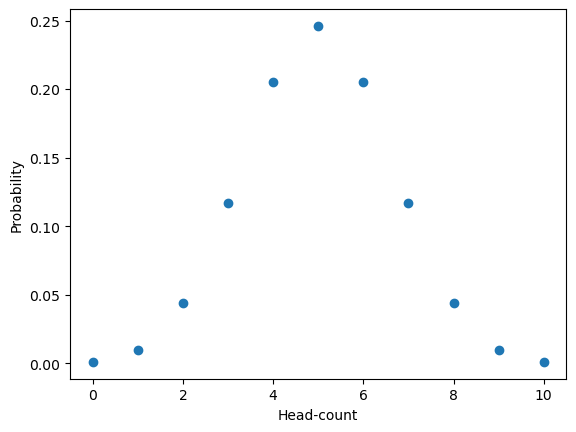

In [10]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

__A scatter plot mapping head counts to their probability of occurence. Probabilities can be inferred by looking at the plot.__

The plot permits us to visually estimate the probability of any head count. Thus, just by glancing at the plot, we can determine that the probability of observing five heads is approximately 0.25. This mapping between x-values and probabilities is referred to as a _probability disribution_. Probability distributions exhibit certain mathematically constistent properties that make them useful for likelihood analysis. For instance, consider the x-values of any probability distribution: they correspond to all the possible values of a random variable r. The probability that r falls within some interval is equal to the area beneath the probability curve over the span of that interval. Therefore, the total area beneath a probability distribution always equals 1.0. This holds for any distribution, including our head-count plot.

In [11]:
# Listing 2.9 -> sum of probabilities i.e. area under curve is 1.0.
sum(prob_x_flips)

1.0

The area beneath the head-count interval of 8 through 10 is equal to the probability of observin eight heads or more. Let's visualise that using the `plt.fill_between` method.

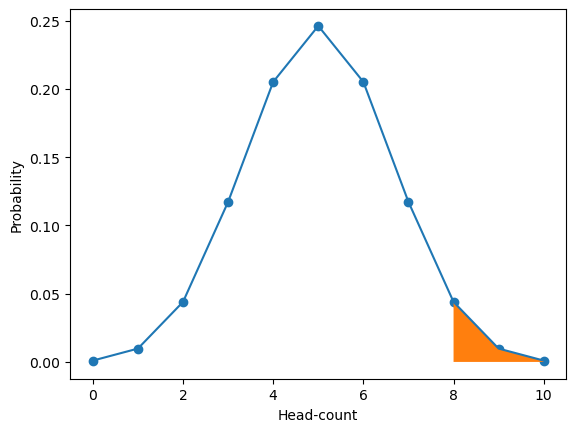

In [12]:
plt.plot(x_10_flips, prob_x_flips)
plt.scatter(x_10_flips, prob_x_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

__Overlaid smooth plot and scatter plot representation of the coin-flip probability distribution. A shaded interval covers head counts 8 through 10. The shaded area equals the probability of observing eight or more heads.__

In [13]:
where

[True, True, True, False, False, False, False, False, False, False, False]

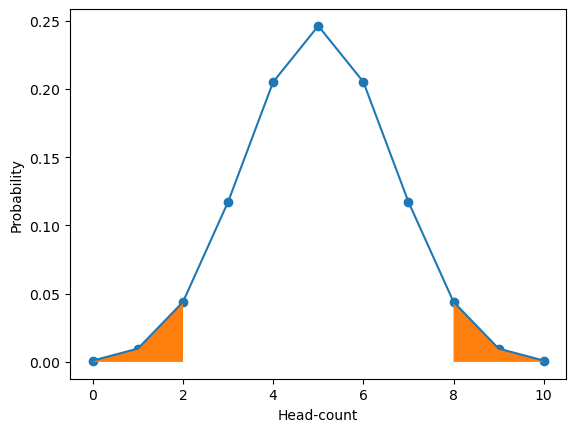

In [14]:
# Let's also shade the interval demarcating the probability of observing eight tails or more.
# The following code highlights the extremes along both tail ends of our probability distribution.

plt.plot(x_10_flips, prob_x_flips)
plt.scatter(x_10_flips, prob_x_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

__Two shaded intervals span an extreme number of heads and tails. The intervals are symmetric, visually implying that their probailities are equal__

In [15]:
# Let's extend the plot to also encompass the distribution for 20 flipped coins
# Computing probabilities for a 20-coin-flip distribution

# Compute x-axis head counts and y-axis probabilities
weighted_sample_space_20_flips = generate_coin_sample_space(20)
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

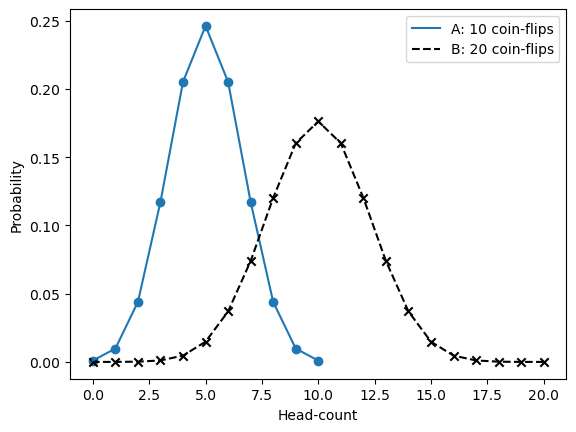

In [16]:
# Let's visualise the two distribution with some style parameters
plt.plot(x_10_flips, prob_x_flips, label='A: 10 coin-flips') # Add label to the legend
plt.scatter(x_10_flips, prob_x_flips)
plt.plot(x_20_flips, prob_x_20_flips, 
         color='k', # change the color of the line to black
         label='B: 20 coin-flips', # Add label to the legend
         linestyle='--' # change the line style to dashed
         ) 
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x') # change the color and marker of points
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend() # Add a legend to the plot
plt.show()

<div class="alert alert-block alert-info">
<b>Common Matplotlib style parameters</b>
<ul>
 <li><code>color</code> - Determines the color of the plotted output. <code>color='red'</code> or <code>color='r'</code> for red and <code>color='black'</code> or <code>color='k'</code></li>
 <li><code>linestyle</code> - Style of plotted line that connects the data points. Default is <code>'-'</code> that generates a connected line. <code>'--'</code>: dashed line  - <code>':'</code>: dotted line - <code>'.'</code>: alternating dashed and dotted line </li></li>
 <li><code>marker</code> - Marker style for indivisually plotted points. Default: <code>'o'</code>: circular marker  - <code>'x'</code>: x-shaped marker - <code>'p'</code>: pentagon shaped marker</li>
 <li><code>label</code> - Maps a label to the specified color and style. This mapping appears in the legend of the plot. Call <code>plt.legend()</code> to make the legend visible</li>
 </ul>
</div>

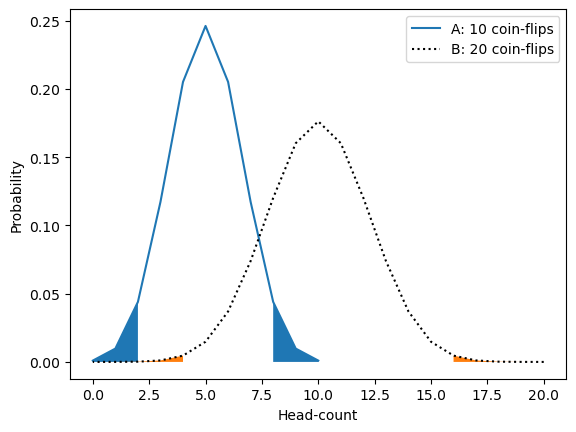

In [18]:
# Hghlighting intervals of interest (80% heads or tails). Note the small area beneath the  curve for
# distribution B; markers are removed and linestyle replaced with ':'

plt.plot(x_10_flips, prob_x_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

#

Without calls to `plt.fill_between` we cannot answer the question we posed earlier: why does the probability of observing 80% or more heads or tails decrease as the fair coin is flipped more times? The answer is hard to extrapolate because the two distributions show little overlap, making it difficult to do a direct visual comparison. Perhaps we can improve the plot by aligning the distribution peaks. To do this, we convert the head counts to frequencies (by dividing by the total coin flips), then both distributions should align at a frequency of 0.5. The conversion should also align our head-count intervals of 8-to-10 and 16-to-20  so they both lie on the interval 8-to-1.0.

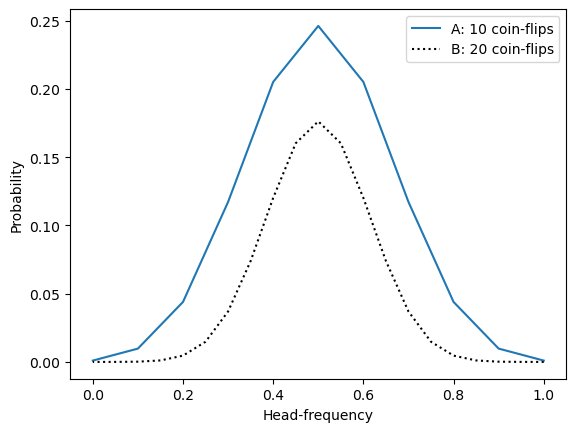

In [20]:
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')

plt.legend()
plt.xlabel('Head-frequency')
plt.ylabel('Probability')
plt.show()


As expected, the two peaks now both align at the head frequency of 0.5. However, our division by the head counts has reduced the areas beneath both the two curves by tenfold and twentyfold, respectively. The total area beneath each curve no longer equals 1.0. This is a problem: as we've discussed, the total area under a curve must sum to 1.0 if we wish to infer an interval probability. However we can fix tha area sums if we multiply the y-axis values of curves A and B by 10 and 20. The adjusted y-values will no longer refer to probabilities, so we'll have to rename them something else. The appropriate term to use is _relative likelihood_, which mathematically refers to a y-axis value within a curve whose total area is 1.0. We therefore name our new y-axis variables `relative_likelihood_10` and `relative_likelihood_20`.

In [21]:
# Computing relative likelihoods of frequencies
relative_likelihood_10 = [10 * prob for prob in prob_x_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

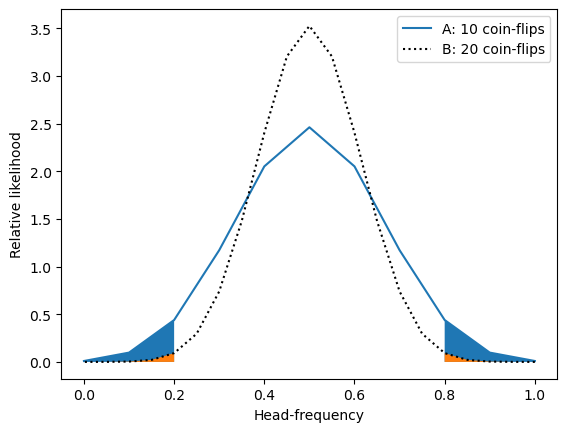

In [24]:
# Plotting aligned relative likelihood curves
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k', linestyle=':', label='B: 20 coin-flips')

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel('Head-frequency')
plt.ylabel('Relative likelihood')
plt.show()

If we flip more thatn 20 coins, how will this influence our frequency distribution? According to probability theory, each additional coin flip will cause the frequency curve to grow even taller and thinner. The curve will transform like a streched rubber band that's being pulled vertically upward: it will lose thickness in exchange for vertical length. As the total number of coin flips extends into the millions and billions, the curve will completely lose its girth, becoming a single very long vertical peak whose center lies at the frequency of 0.5. Beyond that frequency, the non-ecistent area beneath the vertical line will approach 0. It follows that the area beneath the peak will approach 1.0 because our total area must always equal 1.0. This, as the number of coin-flips approaches infinity, the frequency of heads will come to equal the actual probability of heads with absolute certainty.